<a href="https://colab.research.google.com/github/drtaufiqh/coba-coba-coba/blob/main/PreprocessingDataMissForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lampiran Preprocessing Data

## Impor Modul

In [45]:
# !pip install scikit-learn==1.1.2
# !pip install scipy==1.9.1
# !pip install missingpy==0.2.0

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.impute import KNNImputer
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import tensorflow as tf
print("GPU available: ", tf.config.list_physical_devices('GPU'))

GPU available:  []


In [47]:
X_test_raw = pd.read_csv('test_features.csv')
X_test_raw.shape
X_test_raw.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [48]:
# X_train_raw = pd.read_csv('train_features.csv', parse_dates=['tanggal_menjadi_anggota'])
X_train_raw = pd.read_csv('train_features.csv')
X_train_raw.shape
X_train_raw.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [49]:
y_train_raw = pd.read_csv('train_labels.csv')
y_train_raw.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


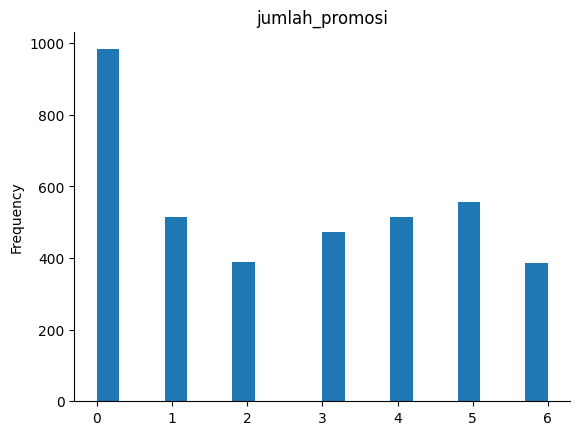

In [50]:
# @title jumlah_promosi

from matplotlib import pyplot as plt
y_train_raw['jumlah_promosi'].plot(kind='hist', bins=20, title='jumlah_promosi')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [51]:
print("Shape")
print("X:", X_train_raw.shape)
print("Y:", y_train_raw.shape)

Shape
X: (3817, 16)
Y: (3817, 1)


In [52]:
X_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [53]:
y_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   jumlah_promosi  3817 non-null   int64
dtypes: int64(1)
memory usage: 29.9 KB


In [54]:
categorical_columns = X_train_raw.select_dtypes(include=['object']).columns
categorical_columns

Index(['pendidikan', 'status_pernikahan', 'tanggal_menjadi_anggota'], dtype='object')

In [55]:
X_train_raw.isnull().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

In [56]:
y_train_raw.isnull().sum()

jumlah_promosi    0
dtype: int64

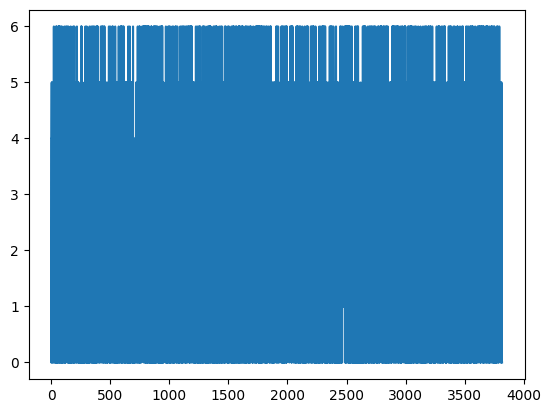

In [57]:
plt.plot(y_train_raw)

<Axes: >

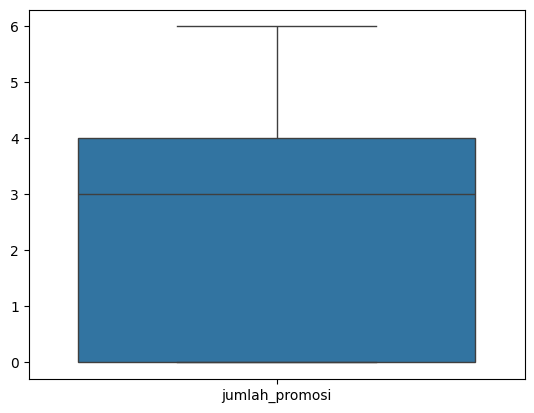

In [58]:
sns.boxplot(y_train_raw)

In [59]:
# Nilai unik setiap kolom
for features_list in categorical_columns:
    features = X_train_raw[features_list].unique()
    print("#"*25)
    print(f"{features_list.title()} Variables : {features} \nPiece:{len(features)}")

#########################
Pendidikan Variables : ['Sarjana' 'Magister' 'SMA' 'SMP' 'Doktor' nan '5'] 
Piece:7
#########################
Status_Pernikahan Variables : ['Rencana Menikah' 'Menikah' 'Sendiri' 'Cerai' nan 'Cerai Mati' '5'] 
Piece:7
#########################
Tanggal_Menjadi_Anggota Variables : ['2014-05-05' '2013-03-17' nan '2013-05-03' '2013-11-21' '2012-11-14'
 '2013-06-23' '2012-10-06' '2013-02-11' '2014-03-28' '2012-11-10'
 '2013-05-02' '2013-01-18' '2014-01-10' '2014-03-14' '2014-02-18'
 '2013-07-06' '2014-02-27' '2014-01-25' '2013-07-05' '2013-05-08'
 '2013-03-30' '2014-06-11' '2013-03-31' '2012-11-06' '2013-04-14'
 '2013-03-12' '2013-05-31' '2013-05-17' '2012-09-13' '2013-09-12'
 '2014-05-14' '2014-05-09' '2013-10-15' '2013-09-06' '2012-12-10'
 '2013-04-13' '2014-03-17' '2013-08-08' '2012-08-19' '2013-01-16'
 '2014-05-23' '2013-03-29' '2014-06-27' '2012-09-06' '2013-09-02'
 '2013-02-19' '2013-02-10' '2013-05-26' '2014-03-03' '2013-04-07'
 '2014-05-26' '2014-01-26' '20

## Imputasi Missing Value dengan KNN

In [60]:
features = X_train_raw.columns

In [61]:
# Membuat kamus untuk melakukan pemetaan antara nilai pendidikan dan nilai pendidikan_encoded
mapping_pendidikan = {
    'SMP': 0,
    'SMA': 1,
    'Sarjana': 2,
    'Magister': 3,
    'Doktor': 4,
    '5': np.nan,
}
# Membuat reverse_mapping secara otomatis berdasarkan mapping
reverse_mapping_pendidikan = {value: key for key, value in mapping_pendidikan.items()}
reverse_mapping_pendidikan

{0: 'SMP', 1: 'SMA', 2: 'Sarjana', 3: 'Magister', 4: 'Doktor', nan: '5'}

In [62]:
# Menggunakan fungsi map() untuk menggantikan nilai pendidikan dengan nilai pendidikan_encoded
X_train_raw['pendidikan_encoded'] = X_train_raw['pendidikan'].map(mapping_pendidikan)

# Inisialisasi LabelEncoder dengan urutan yang diinginkan
label_encoder_pendidikan = LabelEncoder()

# Transformasi data pendidikan
X_train_raw['pendidikan_encoded'] = label_encoder_pendidikan.fit_transform(X_train_raw['pendidikan_encoded'])
X_train_raw['pendidikan_encoded'].unique()

array([2, 3, 1, 0, 4, 5])

In [63]:
# Menggunakan fungsi map() untuk menggantikan nilai pendidikan dengan nilai pendidikan_encoded
X_test_raw['pendidikan_encoded'] = X_test_raw['pendidikan'].map(mapping_pendidikan)

# Transformasi data pendidikan
X_test_raw['pendidikan_encoded'] = label_encoder_pendidikan.transform(X_test_raw['pendidikan_encoded'])
X_test_raw['pendidikan_encoded'].unique()

array([2, 4, 1, 3, 5, 0])

In [64]:
X_train_raw['pendidikan_encoded'] = X_train_raw['pendidikan_encoded'].replace(5, np.nan)
X_test_raw['pendidikan_encoded'] = X_test_raw['pendidikan_encoded'].replace(5, np.nan)

In [65]:
# Membuat kamus untuk melakukan pemetaan antara nilai status_pernikahan dan nilai status_pernikahan_encoded
mapping_status_pernikahan = {
    'Sendiri': 0,
    'Rencana Menikah': 1,
    'Menikah': 2,
    'Cerai': 3,
    'Cerai Mati': 4,
    '5': np.nan,
}
# Membuat reverse_mapping secara otomatis berdasarkan mapping
reverse_mapping_status_pernikahan = {value: key for key, value in mapping_status_pernikahan.items()}
reverse_mapping_pendidikan

{0: 'SMP', 1: 'SMA', 2: 'Sarjana', 3: 'Magister', 4: 'Doktor', nan: '5'}

In [66]:
# Menggunakan fungsi map() untuk menggantikan nilai status_pernikahan dengan nilai status_pernikahan_encoded
X_train_raw['status_pernikahan_encoded'] = X_train_raw['status_pernikahan'].map(mapping_status_pernikahan)

# Inisialisasi LabelEncoder dengan urutan yang diinginkan
label_encoder_status_pernikahan = LabelEncoder()

# Transformasi data status_pernikahan
X_train_raw['status_pernikahan_encoded'] = label_encoder_status_pernikahan.fit_transform(X_train_raw['status_pernikahan_encoded'])
X_train_raw['status_pernikahan_encoded'].unique()

array([1, 2, 0, 3, 5, 4])

In [67]:
# Menggunakan fungsi map() untuk menggantikan nilai status_pernikahan dengan nilai status_pernikahan_encoded
X_test_raw['status_pernikahan_encoded'] = X_test_raw['status_pernikahan'].map(mapping_status_pernikahan)

# Transformasi data status_pernikahan
X_test_raw['status_pernikahan_encoded'] = label_encoder_status_pernikahan.transform(X_test_raw['status_pernikahan_encoded'])
X_test_raw['status_pernikahan_encoded'].unique()

array([5, 2, 1, 0, 4, 3])

In [68]:
X_train_raw['status_pernikahan_encoded'] = X_train_raw['status_pernikahan_encoded'].replace(5, np.nan)
X_test_raw['status_pernikahan_encoded'] = X_test_raw['status_pernikahan_encoded'].replace(5, np.nan)

In [69]:
tanggal_gabungan = pd.concat([X_train_raw['tanggal_menjadi_anggota'], X_test_raw['tanggal_menjadi_anggota']])
tanggal_gabungan

0       2014-05-05
1       2013-03-17
2              NaN
3              NaN
4              NaN
           ...    
3813    2014-03-17
3814           NaN
3815           NaN
3816    2014-01-20
3817    2012-09-15
Name: tanggal_menjadi_anggota, Length: 7635, dtype: object

In [70]:
# Inisialisasi LabelEncoder dengan urutan yang diinginkan
label_encoder_tanggal = LabelEncoder()

tanggal_gabungan_encoded = label_encoder_tanggal.fit_transform(tanggal_gabungan)

tanggal_gabungan_encoded

array([619, 219, 675, ..., 675, 517,  46])

In [71]:
# Transformasi data tanggal_menjadi_anggota
X_train_raw['tanggal_menjadi_anggota_encoded'] = label_encoder_tanggal.transform(X_train_raw['tanggal_menjadi_anggota'])
X_train_raw['tanggal_menjadi_anggota_encoded'].unique()

array([619, 219, 675, 262, 461, 104, 310,  66, 186, 582, 100, 261, 164,
       508, 569, 546, 323, 554, 522, 322, 267, 231, 655, 232,  96, 244,
       215, 289, 276,  44, 391, 628, 623, 424, 385, 129, 243, 571, 356,
        19, 162, 637, 230, 671,  37, 381, 194, 185, 285, 558, 238, 640,
       523, 486, 518, 367, 426, 574, 319, 422, 495, 117,  28, 410, 241,
       211,   7, 433, 485, 552, 620, 254, 142, 359, 143,  25, 490, 296,
       258, 644, 393, 430,  61, 190, 670,  50, 438, 363, 390, 237, 122,
        60, 348, 566,   0, 642,  20,  73, 432, 562, 114, 551, 521, 170,
       593, 102, 440, 253, 596,  15, 169, 587,  75, 209, 400, 387, 168,
       589, 256, 284, 408, 595, 581,  32,  84, 583, 458, 301, 624, 409,
        21, 179, 585, 178, 110,  53,  30, 302, 420, 108, 401, 611, 217,
       353, 148, 603, 371, 259, 602, 609,  77,  83, 315, 127, 220, 137,
       605, 647, 621, 443, 412, 321, 520,  39, 616, 135, 275, 303, 536,
       479, 291,  40, 338, 188, 138, 494, 320, 233, 119, 673, 66

In [72]:
# Transformasi data tanggal_menjadi_anggota
X_test_raw['tanggal_menjadi_anggota_encoded'] = label_encoder_tanggal.transform(X_test_raw['tanggal_menjadi_anggota'])
X_test_raw['tanggal_menjadi_anggota_encoded'].unique()

array([675, 354,  48, 376, 161,  27, 232,  94,  42, 629, 543, 166, 146,
       457,  85, 572,  44, 622,  80, 313, 435, 356, 541, 471, 158,   3,
       605, 373, 274, 642, 197, 245, 329,  57, 380, 126,  29, 580, 289,
       105, 553,  30,  92, 222, 665, 263, 413, 393, 392, 279, 124, 544,
       228, 616, 214, 129, 301, 340,  87, 267, 636, 424, 584, 674, 348,
        79,  45, 663,  76, 588, 130, 426,  40, 332, 305, 445, 671, 311,
       571, 149, 469, 473, 292, 649, 120,  13, 218, 282, 200, 384, 102,
       479,  61, 163, 121, 472, 396, 600, 573, 621, 205, 159, 389,  37,
       575, 377, 215, 341, 390, 563, 516, 661, 145, 187, 667, 535, 221,
        10,  99,  33, 593, 372, 132, 238, 162, 331, 618, 347, 350, 352,
       278, 295, 140,  91,  11, 405, 612, 203, 597, 387, 599, 495, 229,
         6, 101,   4,  72, 300, 585, 549, 168, 446, 262, 551, 623, 640,
        98, 171, 540, 528, 624, 669, 139, 517, 509, 579, 167, 361,  97,
       190, 601, 138, 333, 151, 422, 133, 441, 355, 617, 534, 14

In [73]:
X_train_raw['tanggal_menjadi_anggota_encoded'] = X_train_raw['tanggal_menjadi_anggota_encoded'].replace(675, np.nan)
X_test_raw['tanggal_menjadi_anggota_encoded'] = X_test_raw['tanggal_menjadi_anggota_encoded'].replace(675, np.nan)

In [74]:
X_train_raw.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,pendidikan_encoded,status_pernikahan_encoded,tanggal_menjadi_anggota_encoded
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2.0,1.0,619.0
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,2.0,1.0,219.0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,2.0,2.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,3.0,1.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,2.0,1.0,NaN


In [75]:
data_train = X_train_raw.drop(columns=['pendidikan', 'status_pernikahan', 'tanggal_menjadi_anggota'])
data_test = X_test_raw.drop(columns=['pendidikan', 'status_pernikahan', 'tanggal_menjadi_anggota'])

In [76]:
# Kolom yang ingin diimputasi
imputed_column = data_train.columns


# Buat imputer hanya untuk kolom yang diinginkan
imputer = MissForest()
imputed_data_train = imputer.fit_transform(data_train[imputed_column])

# Ganti kolom-kolom yang diimputasi dengan hasil imputasi
data_train_imputed = data_train.copy()
data_train_imputed[imputed_column] = imputed_data_train

# Tampilkan DataFrame hasil imputasi
data_train_imputed.head(n=5)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 1


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 3


,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,pendidikan_encoded,status_pernikahan_encoded,tanggal_menjadi_anggota_encoded
0,1979.0,1.207829e+08,0.00,1.00,47.46,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2.0,1.0,619.00
1,1950.0,8.406300e+07,0.22,0.91,70.00,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2.0,1.0,219.00
2,1966.0,1.275326e+08,0.00,0.00,45.00,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,2.0,2.0,366.64
3,1961.0,1.655796e+08,0.00,0.00,90.00,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,3.0,1.0,342.39
4,1970.0,1.177032e+08,1.00,1.00,78.00,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,2.0,1.0,162.81


In [77]:
# Kolom yang ingin diimputasi
imputed_column = data_test.columns

# Buat imputer hanya untuk kolom yang diinginkan
imputer = MissForest()
imputed_data_test = imputer.fit_transform(data_test[imputed_column])

# Ganti kolom-kolom yang diimputasi dengan hasil imputasi
data_test_imputed = data_test.copy()
data_test_imputed[imputed_column] = imputed_data_test

# Tampilkan DataFrame hasil imputasi
data_test_imputed.head(n=5)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 1


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 2


,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,pendidikan_encoded,status_pernikahan_encoded,tanggal_menjadi_anggota_encoded
0,2241.0,1957.0,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,2.0,1.37,210.72
1,2274.0,1968.0,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,4.0,2.00,359.83
2,1107.0,1968.0,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,1.0,2.00,354.00
3,4478.0,1971.0,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,4.0,2.00,395.31
4,5080.0,1974.0,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,2.0,1.00,254.71


In [78]:
data_train_imputed.isnull().sum()

tahun_kelahiran                    0
pendapatan                         0
jumlah_anak_balita                 0
jumlah_anak_remaja                 0
terakhir_belanja                   0
belanja_buah                       0
belanja_daging                     0
belanja_ikan                       0
belanja_kue                        0
pembelian_diskon                   0
pembelian_web                      0
pembelian_toko                     0
keluhan                            0
pendidikan_encoded                 0
status_pernikahan_encoded          0
tanggal_menjadi_anggota_encoded    0
dtype: int64

In [79]:
data_test_imputed.isnull().sum()

ID                                 0
tahun_kelahiran                    0
pendapatan                         0
jumlah_anak_balita                 0
jumlah_anak_remaja                 0
terakhir_belanja                   0
belanja_buah                       0
belanja_daging                     0
belanja_ikan                       0
belanja_kue                        0
pembelian_diskon                   0
pembelian_web                      0
pembelian_toko                     0
keluhan                            0
pendidikan_encoded                 0
status_pernikahan_encoded          0
tanggal_menjadi_anggota_encoded    0
dtype: int64

Missing value sudah tertangani

In [80]:
data_reverse = data_train_imputed.copy()
data_reverse['pendidikan'] = data_reverse['pendidikan_encoded'].map(reverse_mapping_pendidikan)
data_reverse['status_pernikahan'] = data_reverse['status_pernikahan_encoded'].map(reverse_mapping_status_pernikahan)
tanggal_menjadi_anggota_encoded = data_reverse['tanggal_menjadi_anggota_encoded'].astype(int)
tanggal_menjadi_anggota_decoded = label_encoder_tanggal.inverse_transform(tanggal_menjadi_anggota_encoded)
data_reverse['tanggal_menjadi_anggota'] = tanggal_menjadi_anggota_decoded
data_reverse = data_reverse[features]
data_reverse

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979.0,Sarjana,Rencana Menikah,1.207829e+08,0.00,1.00,47.46,50575.0,260967.0,50575.00,20230.00,2.0,2.0,5.0,0.0,2014-05-05
1,1950.0,Sarjana,Rencana Menikah,8.406300e+07,0.22,0.91,70.00,6069.0,44506.0,80920.00,20230.00,9.0,6.0,4.0,0.0,2013-03-17
2,1966.0,Sarjana,Menikah,1.275326e+08,0.00,0.00,45.00,117611.0,265460.0,96341.00,145573.00,1.0,1.0,7.0,0.0,2013-08-18
3,1961.0,Magister,Rencana Menikah,1.655796e+08,0.00,0.00,90.00,206346.0,1613901.0,27725.00,125868.00,0.0,7.0,8.0,0.0,2013-07-25
4,1970.0,Sarjana,Rencana Menikah,1.177032e+08,1.00,1.00,78.00,90563.0,311757.0,40358.00,33875.00,7.0,6.0,5.0,0.0,2013-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955.0,Magister,Menikah,7.819947e+07,0.00,0.00,33.00,6069.0,25977.0,3856.00,5784.00,5.0,1.0,0.0,0.0,2013-11-18
3813,1947.0,Doktor,Rencana Menikah,1.093060e+08,0.00,1.00,44.00,0.0,50575.0,7942.36,0.00,3.0,6.0,3.0,0.0,2014-06-09
3814,1974.0,Magister,Menikah,1.046210e+08,0.00,2.00,68.00,2023.0,62713.0,8092.00,0.00,7.0,5.0,7.0,0.0,2013-11-07
3815,1957.0,SMA,Rencana Menikah,1.108500e+08,1.00,1.00,67.00,18207.0,70805.0,24276.00,10802.68,4.0,5.0,4.0,0.0,2013-06-30


In [81]:
data_encoded = data_train_imputed.copy()
data_encoded['pendidikan'] = data_encoded['pendidikan_encoded']
data_encoded['status_pernikahan'] = data_encoded['status_pernikahan_encoded']
data_encoded['tanggal_menjadi_anggota'] = data_encoded['tanggal_menjadi_anggota_encoded'].astype(int)
data_encoded = data_encoded[features]
data_encoded

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979.0,2.0,1.0,1.207829e+08,0.00,1.00,47.46,50575.0,260967.0,50575.00,20230.00,2.0,2.0,5.0,0.0,619
1,1950.0,2.0,1.0,8.406300e+07,0.22,0.91,70.00,6069.0,44506.0,80920.00,20230.00,9.0,6.0,4.0,0.0,219
2,1966.0,2.0,2.0,1.275326e+08,0.00,0.00,45.00,117611.0,265460.0,96341.00,145573.00,1.0,1.0,7.0,0.0,366
3,1961.0,3.0,1.0,1.655796e+08,0.00,0.00,90.00,206346.0,1613901.0,27725.00,125868.00,0.0,7.0,8.0,0.0,342
4,1970.0,2.0,1.0,1.177032e+08,1.00,1.00,78.00,90563.0,311757.0,40358.00,33875.00,7.0,6.0,5.0,0.0,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955.0,3.0,2.0,7.819947e+07,0.00,0.00,33.00,6069.0,25977.0,3856.00,5784.00,5.0,1.0,0.0,0.0,458
3813,1947.0,4.0,1.0,1.093060e+08,0.00,1.00,44.00,0.0,50575.0,7942.36,0.00,3.0,6.0,3.0,0.0,653
3814,1974.0,3.0,2.0,1.046210e+08,0.00,2.00,68.00,2023.0,62713.0,8092.00,0.00,7.0,5.0,7.0,0.0,447
3815,1957.0,1.0,1.0,1.108500e+08,1.00,1.00,67.00,18207.0,70805.0,24276.00,10802.68,4.0,5.0,4.0,0.0,317


In [82]:
id_features = ['ID']
id_features.extend(features)

In [83]:
data_test_reverse = data_test_imputed.copy()
data_test_reverse['pendidikan'] = data_test_reverse['pendidikan_encoded'].map(reverse_mapping_pendidikan)
data_test_reverse['status_pernikahan'] = data_test_reverse['status_pernikahan_encoded'].map(reverse_mapping_status_pernikahan)
tanggal_menjadi_anggota_encoded = data_test_reverse['tanggal_menjadi_anggota_encoded'].astype(int)
tanggal_menjadi_anggota_decoded = label_encoder_tanggal.inverse_transform(tanggal_menjadi_anggota_encoded)
data_test_reverse['tanggal_menjadi_anggota'] = tanggal_menjadi_anggota_decoded
data_test_reverse = data_test_reverse[id_features]
data_test_reverse

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241.0,1957.0,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.00,84305.00,4.00,6.0,10.0,0.0,2013-03-07
1,2274.0,1968.0,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.00,41112.00,2.00,5.0,10.0,0.0,2013-08-11
2,1107.0,1968.0,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.00,26299.00,2.00,0.0,5.0,0.0,2013-08-06
3,4478.0,1971.0,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.00,9745.00,3.00,5.0,7.0,0.0,2013-09-16
4,5080.0,1974.0,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.00,107776.00,0.00,1.0,8.0,0.0,2013-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271.0,1984.0,Magister,Sendiri,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.00,10115.00,4.00,0.0,6.0,1.0,2014-03-17
3814,3334.0,1972.0,Sarjana,Menikah,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.00,78693.00,0.00,6.0,8.0,0.0,2013-07-27
3815,3478.0,1968.0,Magister,Rencana Menikah,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.00,10540.00,0.92,0.0,1.0,0.0,2013-07-22
3816,89.0,1966.0,Sarjana,Rencana Menikah,106301000.0,0.0,1.0,74.0,16184.0,78897.0,20799.77,0.00,3.00,5.0,3.0,0.0,2014-01-20


In [84]:
data_test_encoded = data_test_imputed.copy()
data_test_encoded['pendidikan'] = data_test_encoded['pendidikan_encoded']
data_test_encoded['status_pernikahan'] = data_test_encoded['status_pernikahan_encoded']
data_test_encoded['tanggal_menjadi_anggota'] = data_test_encoded['tanggal_menjadi_anggota_encoded'].astype(int)
data_test_encoded = data_test_encoded[id_features]
data_test_encoded

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241.0,1957.0,2.0,1.37,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.00,84305.00,4.00,6.0,10.0,0.0,210
1,2274.0,1968.0,4.0,2.00,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.00,41112.00,2.00,5.0,10.0,0.0,359
2,1107.0,1968.0,1.0,2.00,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.00,26299.00,2.00,0.0,5.0,0.0,354
3,4478.0,1971.0,4.0,2.00,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.00,9745.00,3.00,5.0,7.0,0.0,395
4,5080.0,1974.0,2.0,1.00,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.00,107776.00,0.00,1.0,8.0,0.0,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271.0,1984.0,3.0,0.00,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.00,10115.00,4.00,0.0,6.0,1.0,571
3814,3334.0,1972.0,2.0,2.00,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.00,78693.00,0.00,6.0,8.0,0.0,344
3815,3478.0,1968.0,3.0,1.00,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.00,10540.00,0.92,0.0,1.0,0.0,339
3816,89.0,1966.0,2.0,1.00,106301000.0,0.0,1.0,74.0,16184.0,78897.0,20799.77,0.00,3.00,5.0,3.0,0.0,517


In [85]:
data_reverse.to_csv('train_features_ImputasiMF.csv', index=True)
data_encoded.to_csv('train_features_ImputasiMF_encoded.csv', index=True)
data_test_reverse.to_csv('test_features_ImputasiMF.csv', index=True)
data_test_encoded.to_csv('test_features_ImputasiMF_encoded.csv', index=True)